In [108]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 20)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Importing Data

In [2]:
df=pd.read_csv("CreditCardDataFinal- Jan23.csv")

In [3]:
df.head(3)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0


# 1. Data Preparation

In the machine learning process, preparing the data is a crucial stage since it may assist to guarantee that the data is correct, consistent, and suitable for modelling.

1.1 Null Values 

In [4]:
df.isnull().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

Four Attributes in our dataset consists of some null values we have multiple options for dealing with 
null values but we will fill it using the mean and mode methods.

In [5]:
df.fillna({"Amount":df["Amount"].mode()[0],
           "Merchant Group":df["Merchant Group"].mode()[0],
           "Shipping Address":df["Shipping Address"].mode()[0],
           "Gender":df["Gender"].mode()[0]},inplace=True)

--------------------------------------------------------------------------------------------------------------------------

1.2 Checking Data Type

Irrelevant data types are one of the worst scenario when working with such data. The Amount attribute in this data is the object type and age is of float type. A conversion is needed in order to transform them into a relevant data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  100000 non-null  object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          100000 non-null  object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        100000 non-null  object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  100000 non-null  object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [7]:
df['Amount'] = df['Amount'].replace({'\£':''}, regex = True)

In [8]:
df['Amount'] = df['Amount'].astype(str).astype(int)


In [9]:
df.head(2)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0


In [10]:
df['Age'] = df['Age'].astype(float).astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Transaction ID          100000 non-null  object
 1   Date                    100000 non-null  object
 2   Day of Week             100000 non-null  object
 3   Time                    100000 non-null  int64 
 4   Type of Card            100000 non-null  object
 5   Entry Mode              100000 non-null  object
 6   Amount                  100000 non-null  int32 
 7   Type of Transaction     100000 non-null  object
 8   Merchant Group          100000 non-null  object
 9   Country of Transaction  100000 non-null  object
 10  Shipping Address        100000 non-null  object
 11  Country of Residence    100000 non-null  object
 12  Gender                  100000 non-null  object
 13  Age                     100000 non-null  int32 
 14  Bank                    100000 non-nu

----------------------------------------------------------------------------------------------------------------------------

1.3 Removing Duplicate Values 

The identification and elimination of duplicate values is a crucial component of data analysis. 
The duplicated() function in Pandas only aids in the analysis of duplicate data. 

In [12]:
df.duplicated().sum()

0

None of the duplicate entries are found

---------------------------------------------------------------------------------------------------------------------------

1.4 Outliers Detection

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

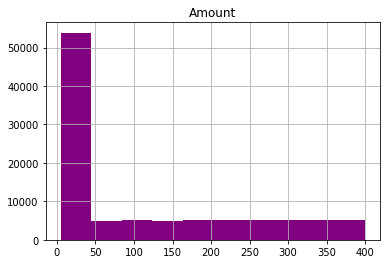

In [13]:
df.hist(column='Amount' ,color='purple')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

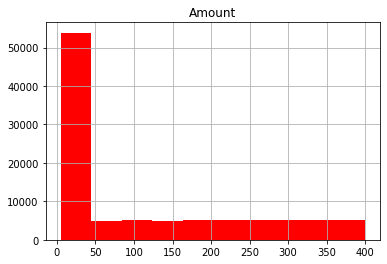

In [14]:
df.hist(column='Amount', color='red')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

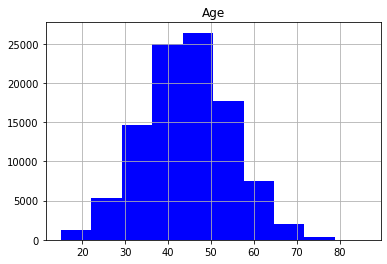

In [15]:
df.hist(column='Age',color='blue')

---------------------------------------------------------------------------------------------------------------------------

# 2. Exploratory Data Analysis -EDA

2.1 Descriptive Statistics

Describing or summarizing the data to into different set of measures which include mean , median , std and Quartile and also minimum and max value.

In [16]:
df.describe()

,Time,Amount,Age,Fraud
count,100000.000000,100000.00000,100000.000000,100000.000000
mean,14.562870,112.57278,44.545070,0.071950
std,5.308195,123.43241,9.950405,0.258406
min,0.000000,5.00000,15.000000,0.000000
25%,10.000000,17.00000,38.000000,0.000000
50%,15.000000,30.00000,44.000000,0.000000
75%,19.000000,208.00000,51.000000,0.000000
max,24.000000,400.00000,86.000000,1.000000


-----------------------------------------------------------------------------------------------------------------------------

2.2 Bar Plot for Unique Counts

<AxesSubplot:title={'center':'Card Type Count'}>

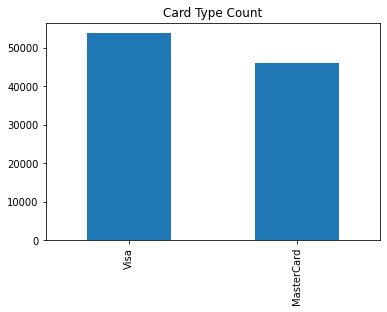

In [17]:
pd.value_counts(df['Type of Card']).plot.bar(title='Card Type Count')

<AxesSubplot:title={'center':'Banks'}>

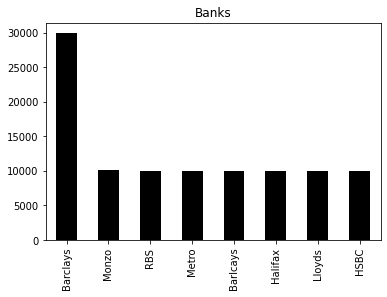

In [18]:
pd.value_counts(df['Bank']).plot.bar(title='Banks',color='black')

<AxesSubplot:title={'center':'Card Use By Groups'}>

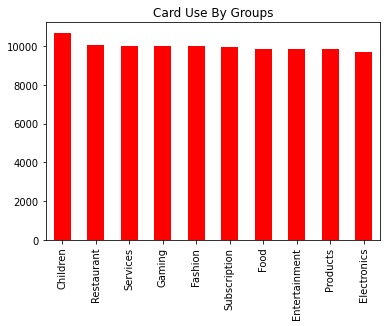

In [19]:
pd.value_counts(df['Merchant Group']).plot.bar(title='Card Use By Groups',color='red')

<AxesSubplot:title={'center':'Total Number of Fraudelent'}>

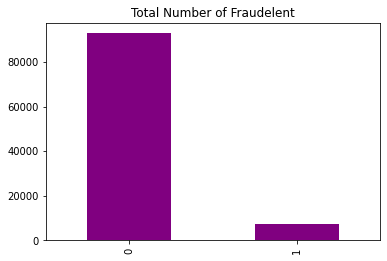

In [20]:
pd.value_counts(df['Fraud']).plot.bar(title='Total Number of Fraudelent',color='purple')

<AxesSubplot:title={'center':'Billing Countries'}>

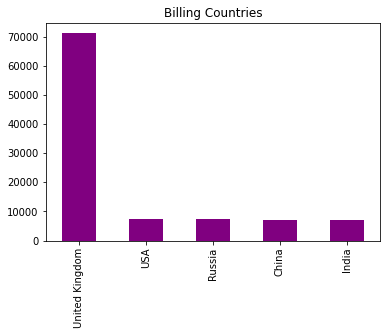

In [21]:
pd.value_counts(df['Country of Transaction']).plot.bar(title='Billing Countries',color='Purple')

---------------------------------------------------------------------------------------------------------------------------

2.3 Correlation HeatMap

In [22]:
df.corr()

,Time,Amount,Age,Fraud
Time,1.000000,0.030017,-0.000979,-0.286375
Amount,0.030017,1.000000,-0.004437,-0.109864
Age,-0.000979,-0.004437,1.000000,-0.002877
Fraud,-0.286375,-0.109864,-0.002877,1.000000


<AxesSubplot:>

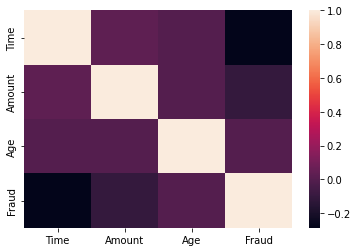

In [23]:
sns.heatmap(df.corr())

---------------------------------------------------------------------------------------------------------------------------

2.4 Pie Chart

<AxesSubplot:title={'center':'Amount By Each Card'}, ylabel='Amount'>

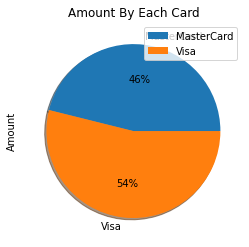

In [24]:
df.groupby(['Type of Card']).sum().plot(kind='pie', y='Amount',autopct='%1.0f%%',title='Amount By Each Card',shadow=True)

<AxesSubplot:title={'center':'Card Holder By Gender'}, ylabel='Fraud'>

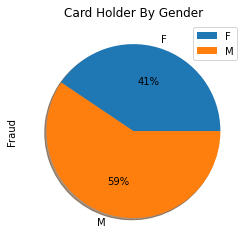

In [25]:
df.groupby(['Gender']).sum().plot(kind='pie', y='Fraud',autopct='%1.0f%%',title='Card Holder By Gender',shadow=True)

---------------------------------------------------------------------------------------------------------------------------

In [26]:
df.head(4)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,288,POS,Services,USA,USA,USA,F,49,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,5,POS,Restaurant,India,India,India,F,42,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51,Barclays,0


# 3. Feature Selection

The selection of features are based on some correlations values which provides negative correlation among some numerical and target variable. The selection of other features are based on the assumptions and their relevance with the Fraud Variable
Step to Omit some attributes are based on the value they contain for example ID is surely not a relevant data attribute to predict about the Fraud, Same is the case with dates value and Gender , age also couldnot determine the fraud detection.

In [27]:
X=df[['Entry Mode','Time','Country of Transaction','Shipping Address','Country of Residence']]
y=df['Fraud']

3.1 Conversion of Categorical Variable to Numeric 

In [28]:
categorical_columns = X.select_dtypes(['object']).columns

In [29]:
X[categorical_columns] = X[categorical_columns].apply(lambda x: pd.factorize(x)[0])

c:\users\ht\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
X

,Entry Mode,Time,Country of Transaction,Shipping Address,Country of Residence
0,0,19,0,0,0
1,1,17,1,1,1
2,0,14,2,2,2
3,0,14,0,2,0
4,2,23,1,1,0
...,...,...,...,...,...
99995,0,22,0,0,0
99996,1,23,3,3,3
99997,1,11,0,0,0
99998,0,22,0,0,0


3.2 Train-Test Split

In [31]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.30,random_state=42)  

----------------------------------------------------------------------------------------------------------------------------

# 4. Model Building

# 4.1 Logistic  Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_model= LogisticRegression(random_state=42)  
logistic_model.fit(x_train, y_train)  

LogisticRegression(random_state=42)

In [34]:
logistic_model.score(x_train,y_train)

0.9466142857142857

-------------------------------------------------------------------------------------------------------------------------------

# 4.2 Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
decision_tree=DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
decision_tree.score(x_train,y_train)

0.9729714285714286

-------------------------------------------------------------------------------------------------------------------------------

# 4.3  Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier 

In [39]:
random_forest=RandomForestClassifier(n_estimators=1000) 
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [40]:
random_forest.score(x_train,y_train)

0.9729714285714286

------------------------------------------------------------------------------------------------------------------------------

# 4.4 Baggy Classifier

In [41]:
from sklearn.ensemble import BaggingClassifier

In [42]:
bagging_model=BaggingClassifier(
base_estimator=RandomForestClassifier(),
    n_estimators=100,
    max_samples=0.5,
    oob_score=True,
    random_state=0
)
bagging_model.fit(x_train,y_train)
bagging_model.oob_score_

0.9716142857142858

--------------------------------------------------------------------------------------------------------------------------------

# 4.5 AdaBoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
Ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
Ada_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)

In [45]:
Ada_model.score(x_train,y_train)

0.9717857142857143

--------------------------------------------------------------------------------------------------------------------------

# 4.6 XGBoost Classifier

In [46]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [47]:
xgb_classifier.score(x_train,y_train)

0.9728714285714286

-------------------------------------------------------------------------------------------------------------------------------

# 4.7 Artificial Neural Network - ANN

In [48]:
Ann_model = keras.Sequential([
    #input layer
    keras.layers.Dense(3, input_shape=(5,), activation='relu'),
   
    keras.layers.Dense(1, activation='sigmoid')
])
Ann_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Ann_model.fit(x_train, y_train)

2188/2188 [==============================] - 9s 3ms/step - loss: 1.3095 - accuracy: 0.6423


In [49]:
Ann_model.fit(x_train,y_train,batch_size=50,epochs=10)

Epoch 1/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2401 - accuracy: 0.9561
Epoch 2/10
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1874 - accuracy: 0.9564
Epoch 3/10
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1619 - accuracy: 0.9555
Epoch 4/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1407 - accuracy: 0.9531
Epoch 5/10
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1278 - accuracy: 0.9530
Epoch 6/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1225 - accuracy: 0.9540
Epoch 7/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.1189 - accuracy: 0.9550
Epoch 8/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1160 - accuracy: 0.9554
Epoch 9/10
1400/1400 [==============================] - 5s 4ms/step - loss: 0.1138 - accuracy: 0.9570
Epoch 10/10
1400/1400 [==============================] - 4s 3ms/step - loss: 0.111

------------------------------------------------------------------------------------------------------------------------------

# 5. Model Evaluation

5.1 Logistic Regression Evaluation

In [50]:
y_pred_log=logistic_model.predict(x_test)

In [51]:
print('Logistic Regression Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred_log)))

Logistic Regression Model accuracy score is : 0.9459


In [52]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     27791
           1       0.71      0.45      0.55      2209

    accuracy                           0.95     30000
   macro avg       0.83      0.72      0.76     30000
weighted avg       0.94      0.95      0.94     30000



In [53]:
s_log = cross_val_score(logistic_model, x_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores are:{}'.format(s_log))

Cross-validation scores are:[0.94433333 0.94033333 0.94433333 0.94716667 0.9485    ]


In [54]:
c_matrix_log = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_log)
c_matrix_log

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27380,   411],
       [ 1212,   997]])>

Text(33.0, 0.5, 'Truth')

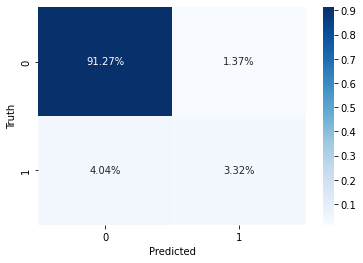

In [122]:
sns.heatmap(c_matrix_log/np.sum(c_matrix_log), annot=True, 
            fmt='.2%', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

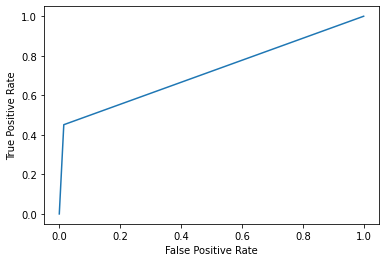

In [109]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_log)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------

5.2 Decision Tree Classifier Evaluation

In [56]:
y_pred_tree=decision_tree.predict(x_test)

In [57]:
print('Decision Tree Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred_tree)))

Decision Tree Model accuracy score is : 0.9706


In [58]:
d_log = cross_val_score(decision_tree, x_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores are:{}'.format(d_log))

Cross-validation scores are:[0.97033333 0.969      0.96916667 0.96916667 0.97066667]


In [59]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27791
           1       0.86      0.71      0.78      2209

    accuracy                           0.97     30000
   macro avg       0.92      0.85      0.88     30000
weighted avg       0.97      0.97      0.97     30000



In [60]:
c_matrix_tree = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_tree)
c_matrix_tree

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27544,   247],
       [  635,  1574]])>

Text(33.0, 0.5, 'Truth')

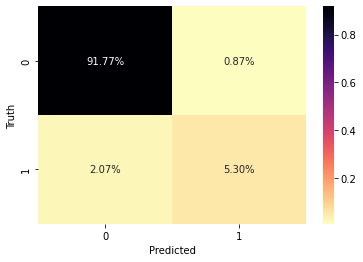

In [121]:
sns.heatmap(c_matrix_tree/np.sum(c_matrix_tree), annot=True, 
            fmt='.2%', cmap='magma_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

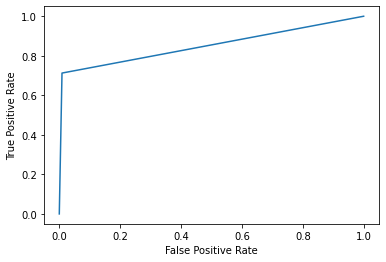

In [110]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_tree)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

---------------------------------------------------------------------------------------------------------------------------

5.3 Bagging Classifier Evaluation

In [62]:
y_pred_bag=bagging_model.predict(x_test)

In [63]:
print('Bagging Classifier accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred_bag)))

Bagging Classifier accuracy score is : 0.9710


In [64]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27791
           1       0.87      0.72      0.79      2209

    accuracy                           0.97     30000
   macro avg       0.92      0.85      0.88     30000
weighted avg       0.97      0.97      0.97     30000



In [72]:
c_matrix_bag = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_bag)
c_matrix_tree

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27530,   261],
       [  620,  1589]])>

Text(33.0, 0.5, 'Truth')

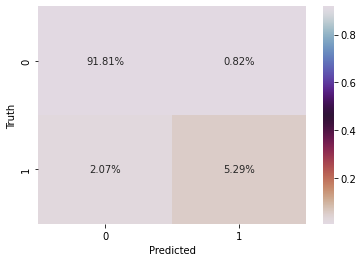

In [120]:
sns.heatmap(c_matrix_bag/np.sum(c_matrix_bag), annot=True, 
            fmt='.2%', cmap='twilight_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

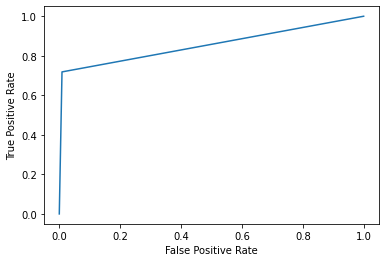

In [111]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_bag)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

5.4 Random Forest Evaluation

In [68]:
y_pred_forest=random_forest.predict(x_test)

In [69]:
print('Random Forest Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred_forest)))

Random Forest Model accuracy score is : 0.9706


In [70]:
r_log = cross_val_score(random_forest, x_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores are:{}'.format(r_log))

Cross-validation scores are:[0.97116667 0.97016667 0.96983333 0.96983333 0.971     ]


In [98]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27791
           1       0.86      0.72      0.78      2209

    accuracy                           0.97     30000
   macro avg       0.92      0.85      0.88     30000
weighted avg       0.97      0.97      0.97     30000



In [74]:
c_matrix_forest = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_forest)
c_matrix_forest

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27530,   261],
       [  620,  1589]])>

Text(33.0, 0.5, 'Truth')

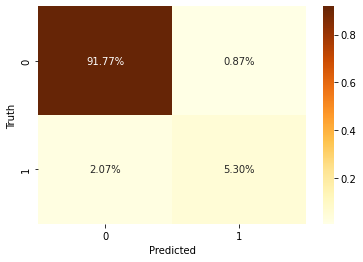

In [119]:
sns.heatmap(c_matrix_forest/np.sum(c_matrix_forest), annot=True, 
            fmt='.2%', cmap='YlOrBr')
plt.xlabel('Predicted')
plt.ylabel('Truth')

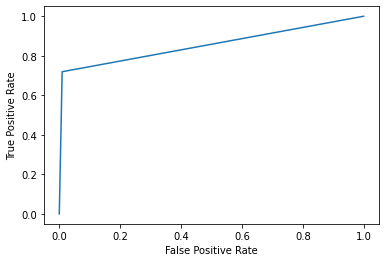

In [112]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_forest)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

----------------------------------------------------------------------------------------------------------------------------

5.5 AdaBoost Evaluation

In [77]:
y_pred_Ada=Ada_model.predict(x_test)

In [78]:
print('Ada boost Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred_Ada)))

Ada boost Model accuracy score is : 0.9724


In [79]:
ada_log = cross_val_score(random_forest, x_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores are:{}'.format(ada_log))

Cross-validation scores are:[0.97133333 0.96966667 0.9705     0.96883333 0.971     ]


In [99]:
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27791
           1       0.83      0.78      0.81      2209

    accuracy                           0.97     30000
   macro avg       0.91      0.88      0.90     30000
weighted avg       0.97      0.97      0.97     30000



In [80]:
c_matrix_Ada = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_Ada)
c_matrix_Ada

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27450,   341],
       [  488,  1721]])>

Text(33.0, 0.5, 'Truth')

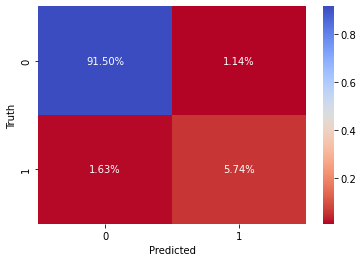

In [118]:
sns.heatmap(c_matrix_Ada/np.sum(c_matrix_Ada), annot=True, 
            fmt='.2%', cmap='coolwarm_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

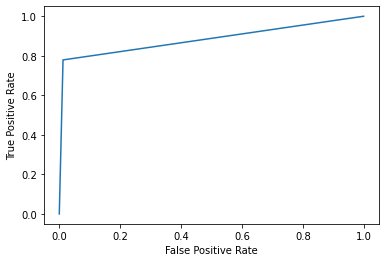

In [113]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_Ada)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

----------------------------------------------------------------------------------------------------------------------------

5.6 XGBoost Evaluation

In [88]:
y_pred_boost=xgb_classifier.predict(x_test)

In [89]:
print('XGboost Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred_boost)))

XGboost Model accuracy score is : 0.9704


In [90]:
boost_log = cross_val_score(xgb_classifier, x_test, y_test, cv = 5, scoring='accuracy')
print('Cross-validation scores are:{}'.format(boost_log))

Cross-validation scores are:[0.972      0.97033333 0.97133333 0.969      0.97116667]


In [100]:
print(classification_report(y_test, y_pred_boost))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27791
           1       0.85      0.72      0.78      2209

    accuracy                           0.97     30000
   macro avg       0.92      0.86      0.88     30000
weighted avg       0.97      0.97      0.97     30000



In [91]:
c_matrix_boost = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_boost)
c_matrix_boost

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27519,   272],
       [  616,  1593]])>

Text(33.0, 0.5, 'Truth')

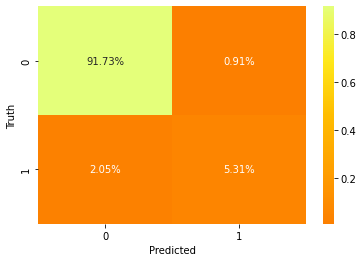

In [117]:
sns.heatmap(c_matrix_boost/np.sum(c_matrix_boost), annot=True, 
            fmt='.2%', cmap='Wistia_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')

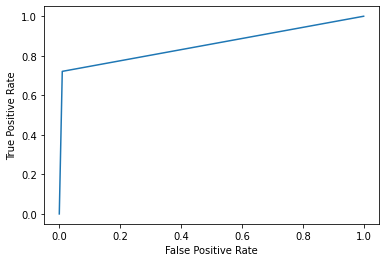

In [114]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_boost)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

5.7 ANN Evaluation

In [96]:
Ann_model.evaluate(x_test, y_test)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1113 - accuracy: 0.9576
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9578
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1104 - accuracy: 0.9578
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1100 - accuracy: 0.9580
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1098 - accuracy: 0.9581
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1093 - accuracy: 0.9582
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1093 - accuracy: 0.9582
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9582
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9582
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9584

In [102]:
y_pre_Ann=Ann_model.predict(x_test)

938/938 [==============================] - 1s 1ms/step


In [103]:
y_pred_Ann = []
for element in y_pre_Ann:
    if element > 0.5:
        y_pred_Ann.append(1)
    else:
        y_pred_Ann.append(0)

In [104]:
print(classification_report(y_test,y_pred_Ann))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27791
           1       0.80      0.59      0.68      2209

    accuracy                           0.96     30000
   macro avg       0.88      0.79      0.83     30000
weighted avg       0.96      0.96      0.96     30000



In [105]:
c_matrix_Ann = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_Ann)
c_matrix_Ann

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[27458,   333],
       [  910,  1299]])>

Text(33.0, 0.5, 'Truth')

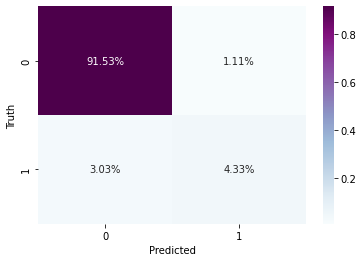

In [116]:
sns.heatmap(c_matrix_Ann/np.sum(c_matrix_Ann), annot=True, 
            fmt='.2%', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

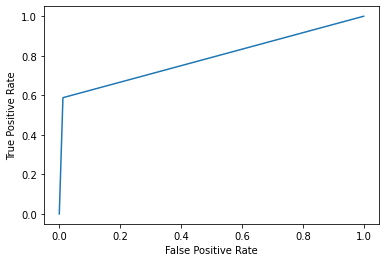

In [115]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_Ann)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

-----------------------------------------------------------------------------------------------------------------------------

# 6. Model Predictions Comparison

----------------------------------------------------------------------------------------------------------------------------

# 7. References